In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from util import export_chart_json

# Load CSV with Historical Rent and Price data for U.S. Cities over 100k in population
- Data contains: 
    - name: city name
    - year: data year
    - total_population: total population
    - median_contract_rent: median contract rent
    - median_home_value: median home value 
    - price_to_rent: calculated using by taking the quotient of median home value and twelve months of median rent 
      

In [84]:
timeseries_df = pd.read_csv("data/historical.csv")
timeseries_df.head()

,name,year,total_population,median_contract_rent,median_home_value,price_to_rent
0,"Los Angeles, California",2010,3831880,995,465700,39.003350
1,"Los Angeles, California",2011,3797144,1015,452300,37.134647
2,"Los Angeles, California",2012,3819708,1033,438300,35.358180
3,"Los Angeles, California",2013,3857786,1049,421700,33.500159
4,"Los Angeles, California",2014,3884340,1084,451200,34.686347


# Transform Data to Plot Multi Line Chart Showing Trend in Price to Rent Ratios for Top 15 Most Populated Cities from 2010 to 2019

In [85]:
# Get list of top 15 most populated cities in 2019 and the US average 
most_populated_cities = list(timeseries_df.loc[timeseries_df["year"]==2019].sort_values(
    "total_population", ascending=False).name[:16])
print(most_populated_cities)
# Use list to filter timeseries_df to only show row with cities in this top 15 list
most_populated_timeseries_df = timeseries_df[timeseries_df['name'].isin(most_populated_cities)]

['New York, New York', 'Los Angeles, California', 'Chicago, Illinois', 'Houston, Texas', 'Phoenix, Arizona', 'Philadelphia, Pennsylvania', 'San Antonio, Texas', 'San Diego, California', 'Dallas, Texas', 'San Jose, California', 'Austin, Texas', 'Jacksonville, Florida', 'Fort Worth, Texas', 'Columbus, Ohio', 'San Francisco, California', 'Charlotte, North Carolina']


In [95]:
# Pivot most_populated_timeseries_df_pivot such that columns are city names and each row is price to rent
# ratio for each year (rows are years)
most_populated_timeseries_df_pivot = most_populated_timeseries_df.pivot(
                                index="year", columns="name", values="price_to_rent")

# Add column in to track average for top 15 cities
most_populated_timeseries_df_pivot["USA Top 15 Cities Average"] = list(most_populated_timeseries_df_pivot.mean(axis=1))
most_populated_timeseries_df_pivot

name,"Austin, Texas","Charlotte, North Carolina","Chicago, Illinois","Columbus, Ohio","Dallas, Texas","Fort Worth, Texas","Houston, Texas","Jacksonville, Florida","Los Angeles, California","New York, New York","Philadelphia, Pennsylvania","Phoenix, Arizona","San Antonio, Texas","San Diego, California","San Francisco, California","San Jose, California",USA Top 15 Cities Average
year,,,,,,,,,,,,,,,,,
2010,24.003136,21.146435,28.385417,18.787384,17.465224,16.226667,16.309888,19.006849,39.003350,43.726781,18.768769,21.276844,15.180467,31.382079,47.738821,36.775786,25.948994
2011,23.897059,21.759941,26.064283,18.719413,16.963364,16.351209,15.768842,17.989786,37.134647,41.136660,17.423133,19.126869,15.010433,30.810205,48.448145,36.085271,25.168079
2012,23.870614,19.647887,24.112801,16.906283,15.481594,15.812303,15.254873,16.714015,35.358180,38.483851,17.124940,16.727494,14.222391,29.780738,44.072986,34.746852,23.644863
2013,22.192246,18.995929,21.752980,16.614338,16.323529,13.998059,15.114022,14.655172,33.500159,36.441194,16.561918,16.421225,14.030485,29.163276,41.558145,32.102748,22.464089
2014,22.672847,18.119266,21.072568,15.761978,14.969354,14.176110,14.774330,14.055050,34.686347,36.155556,15.281501,18.706777,13.961353,29.518873,45.023148,34.560858,22.718495
2015,23.357065,18.098796,21.599843,15.859031,16.194751,14.774838,15.291041,14.335512,38.018953,35.646552,16.304825,20.299728,13.678161,30.274889,45.882098,34.718724,23.395925
2016,24.438105,19.186992,23.003472,16.182720,16.798942,14.891068,16.198382,15.260417,38.910422,37.413122,16.162591,21.508141,13.955026,32.026501,48.756992,35.339050,24.376996
2017,24.672105,18.719807,22.188865,16.194751,16.262940,15.848027,16.376551,15.881643,41.146700,38.441296,15.882838,22.108209,14.416451,32.253297,49.297131,36.322464,24.750817
2018,24.865471,19.043832,22.831906,16.732980,18.362235,16.607843,16.743827,17.580453,42.387317,40.215096,17.056650,22.620447,15.672589,32.191120,51.661052,35.701754,25.642161


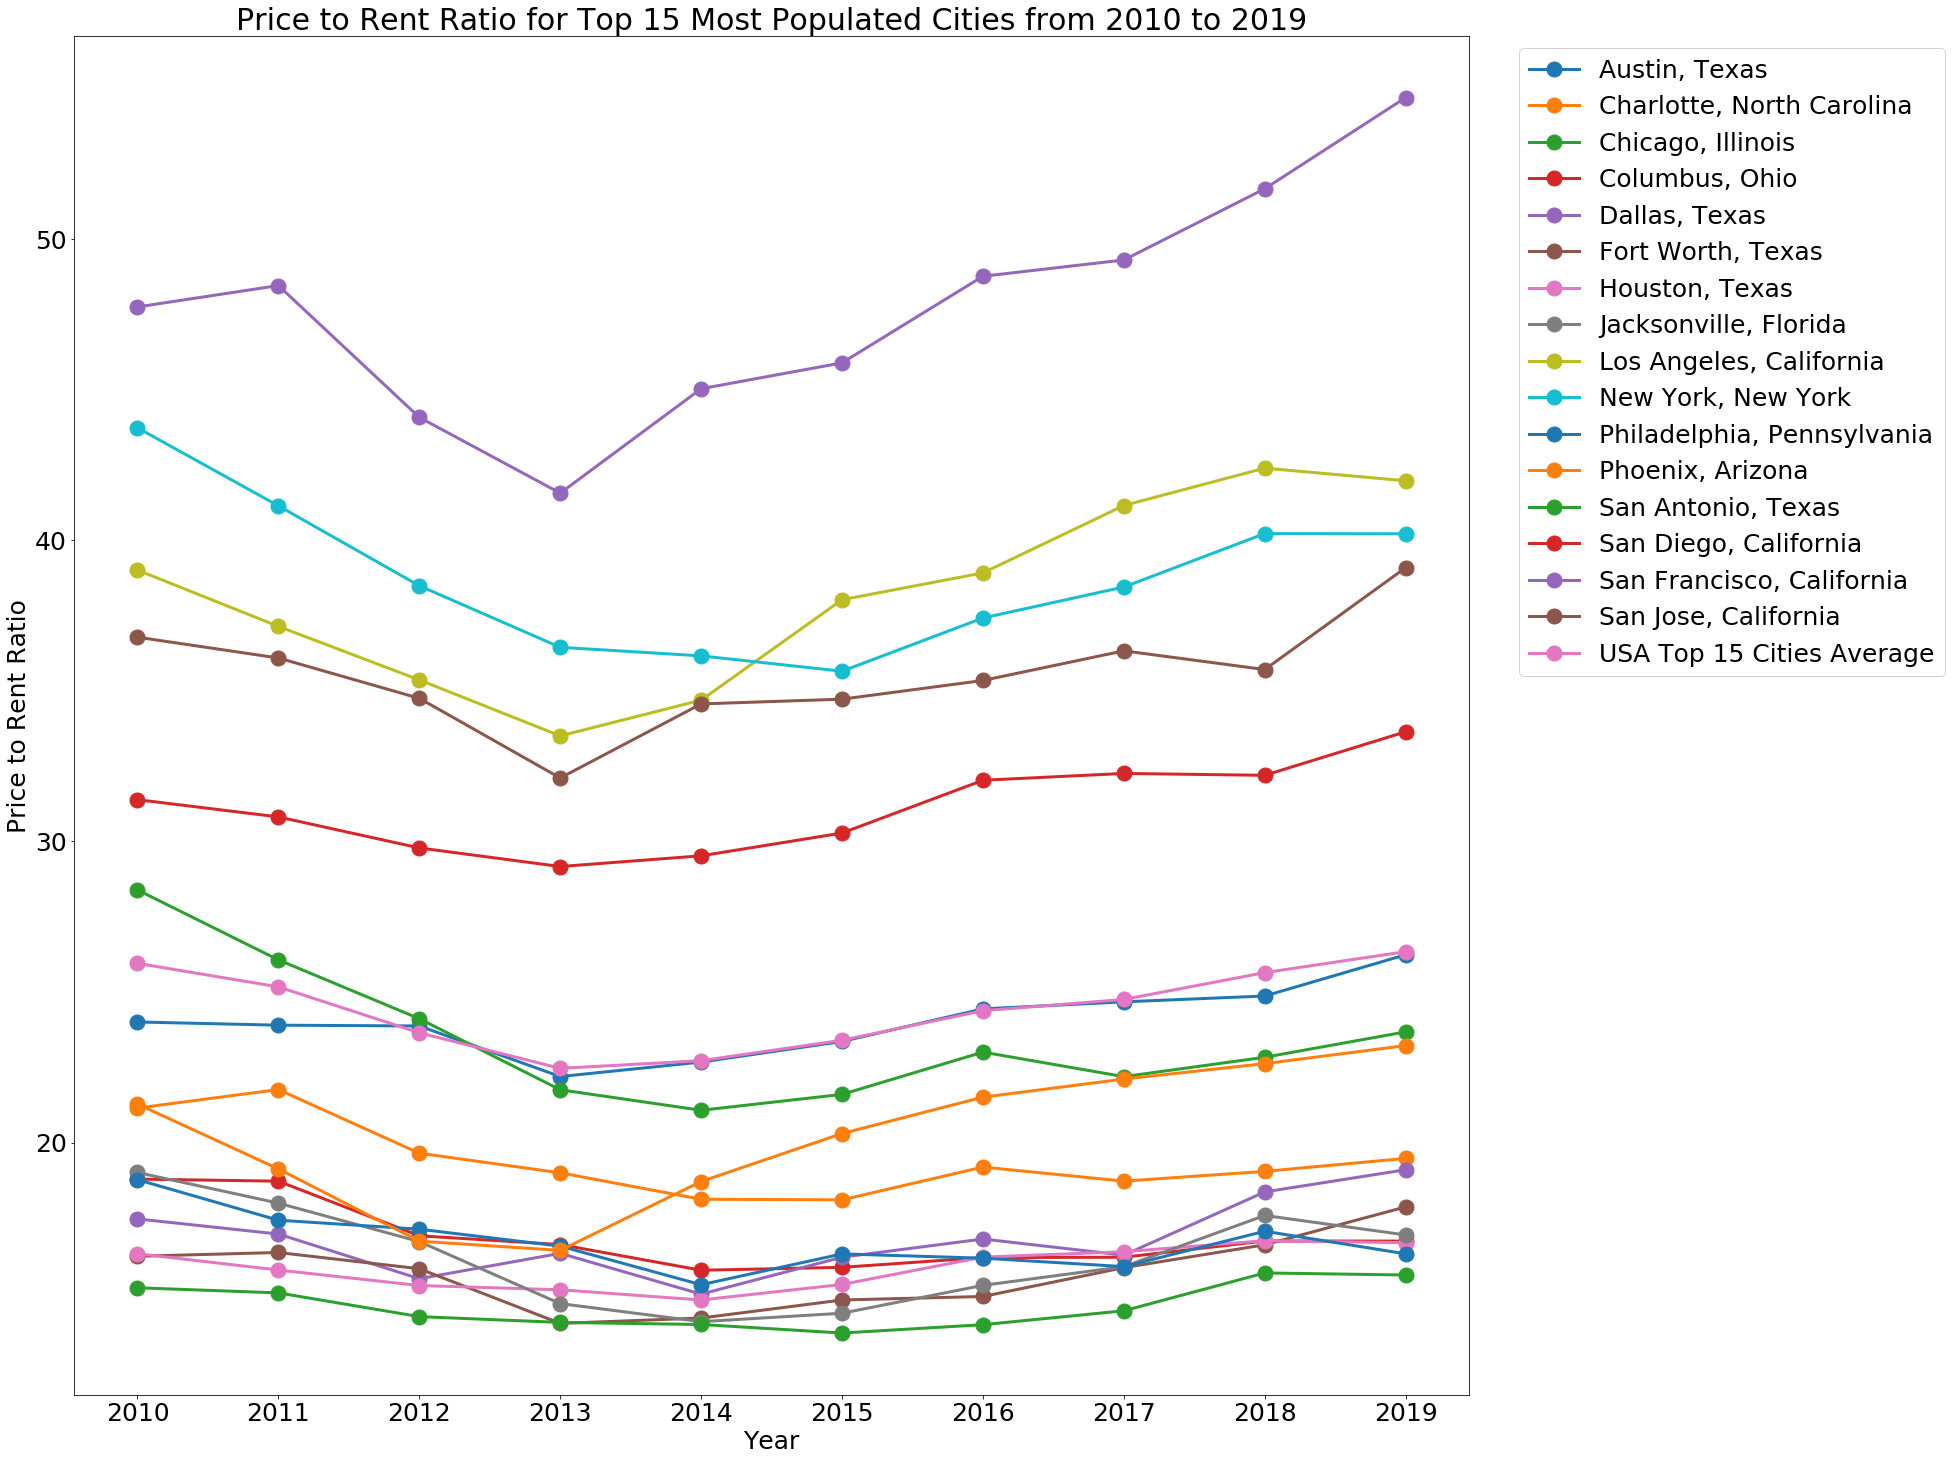

In [96]:
ax = most_populated_timeseries_df_pivot.plot(
    figsize=(25,25),
    legend=True,
    linewidth=3,
    marker='o',
    markersize=15,
)
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))
matplotlib.rcParams.update({'font.size': 25})

ax.set_title('Price to Rent Ratio for Top 15 Most Populated Cities from 2010 to 2019',
             fontdict={'fontsize': 30, 'fontweight': 'medium'})
plt.xticks(np.arange(2010, 2020, step=1))
plt.xlabel('Year', fontsize=25)
plt.ylabel('Price to Rent Ratio', fontsize=25)
plt.savefig('images/Top_15_Timeseries.jpg',  dpi=300, bbox_inches = "tight")

plt.show()

In [97]:
# Reset index on most_populated_timeseries_df_pivot and transpose to pass df to helper function export_chart_json
# which formats data for use with Chart.js multi Line chart
export_chart_json(most_populated_timeseries_df_pivot.reset_index().transpose())

'{"labels": [2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0], "datasets": [{"label": "Austin, Texas", "data": [24.0, 23.9, 23.9, 22.2, 22.7, 23.4, 24.4, 24.7, 24.9, 26.2], "fill": false}, {"label": "Charlotte, North Carolina", "data": [21.1, 21.8, 19.6, 19.0, 18.1, 18.1, 19.2, 18.7, 19.0, 19.5], "fill": false}, {"label": "Chicago, Illinois", "data": [28.4, 26.1, 24.1, 21.8, 21.1, 21.6, 23.0, 22.2, 22.8, 23.7], "fill": false}, {"label": "Columbus, Ohio", "data": [18.8, 18.7, 16.9, 16.6, 15.8, 15.9, 16.2, 16.2, 16.7, 16.7], "fill": false}, {"label": "Dallas, Texas", "data": [17.5, 17.0, 15.5, 16.3, 15.0, 16.2, 16.8, 16.3, 18.4, 19.1], "fill": false}, {"label": "Fort Worth, Texas", "data": [16.2, 16.4, 15.8, 14.0, 14.2, 14.8, 14.9, 15.8, 16.6, 17.9], "fill": false}, {"label": "Houston, Texas", "data": [16.3, 15.8, 15.3, 15.1, 14.8, 15.3, 16.2, 16.4, 16.7, 16.7], "fill": false}, {"label": "Jacksonville, Florida", "data": [19.0, 18.0, 16.7, 14.7, 14.1, 14.3, 

# Computed Indexed Price to Rent Ratios For Top 15 Most Populated Cites from 2010 to 2019 

In [98]:
indexed_timeseries_df = pd.DataFrame()

# calculate indexed rent to price ratios starting with min date (2010) for each city
for i, row in most_populated_timeseries_df_pivot.reset_index().transpose().iterrows():
    if i == "year":
        indexed_timeseries_df[i] = row
        continue

    first_val = row[0]
    index_vals = [100,]
    for val in row[1:]:
        index_vals.append(val/first_val*100)
    indexed_timeseries_df[i] = pd.Series(index_vals)
    
# Set index to year column (needed for multi line plot)
indexed_timeseries_df = indexed_timeseries_df.set_index("year")

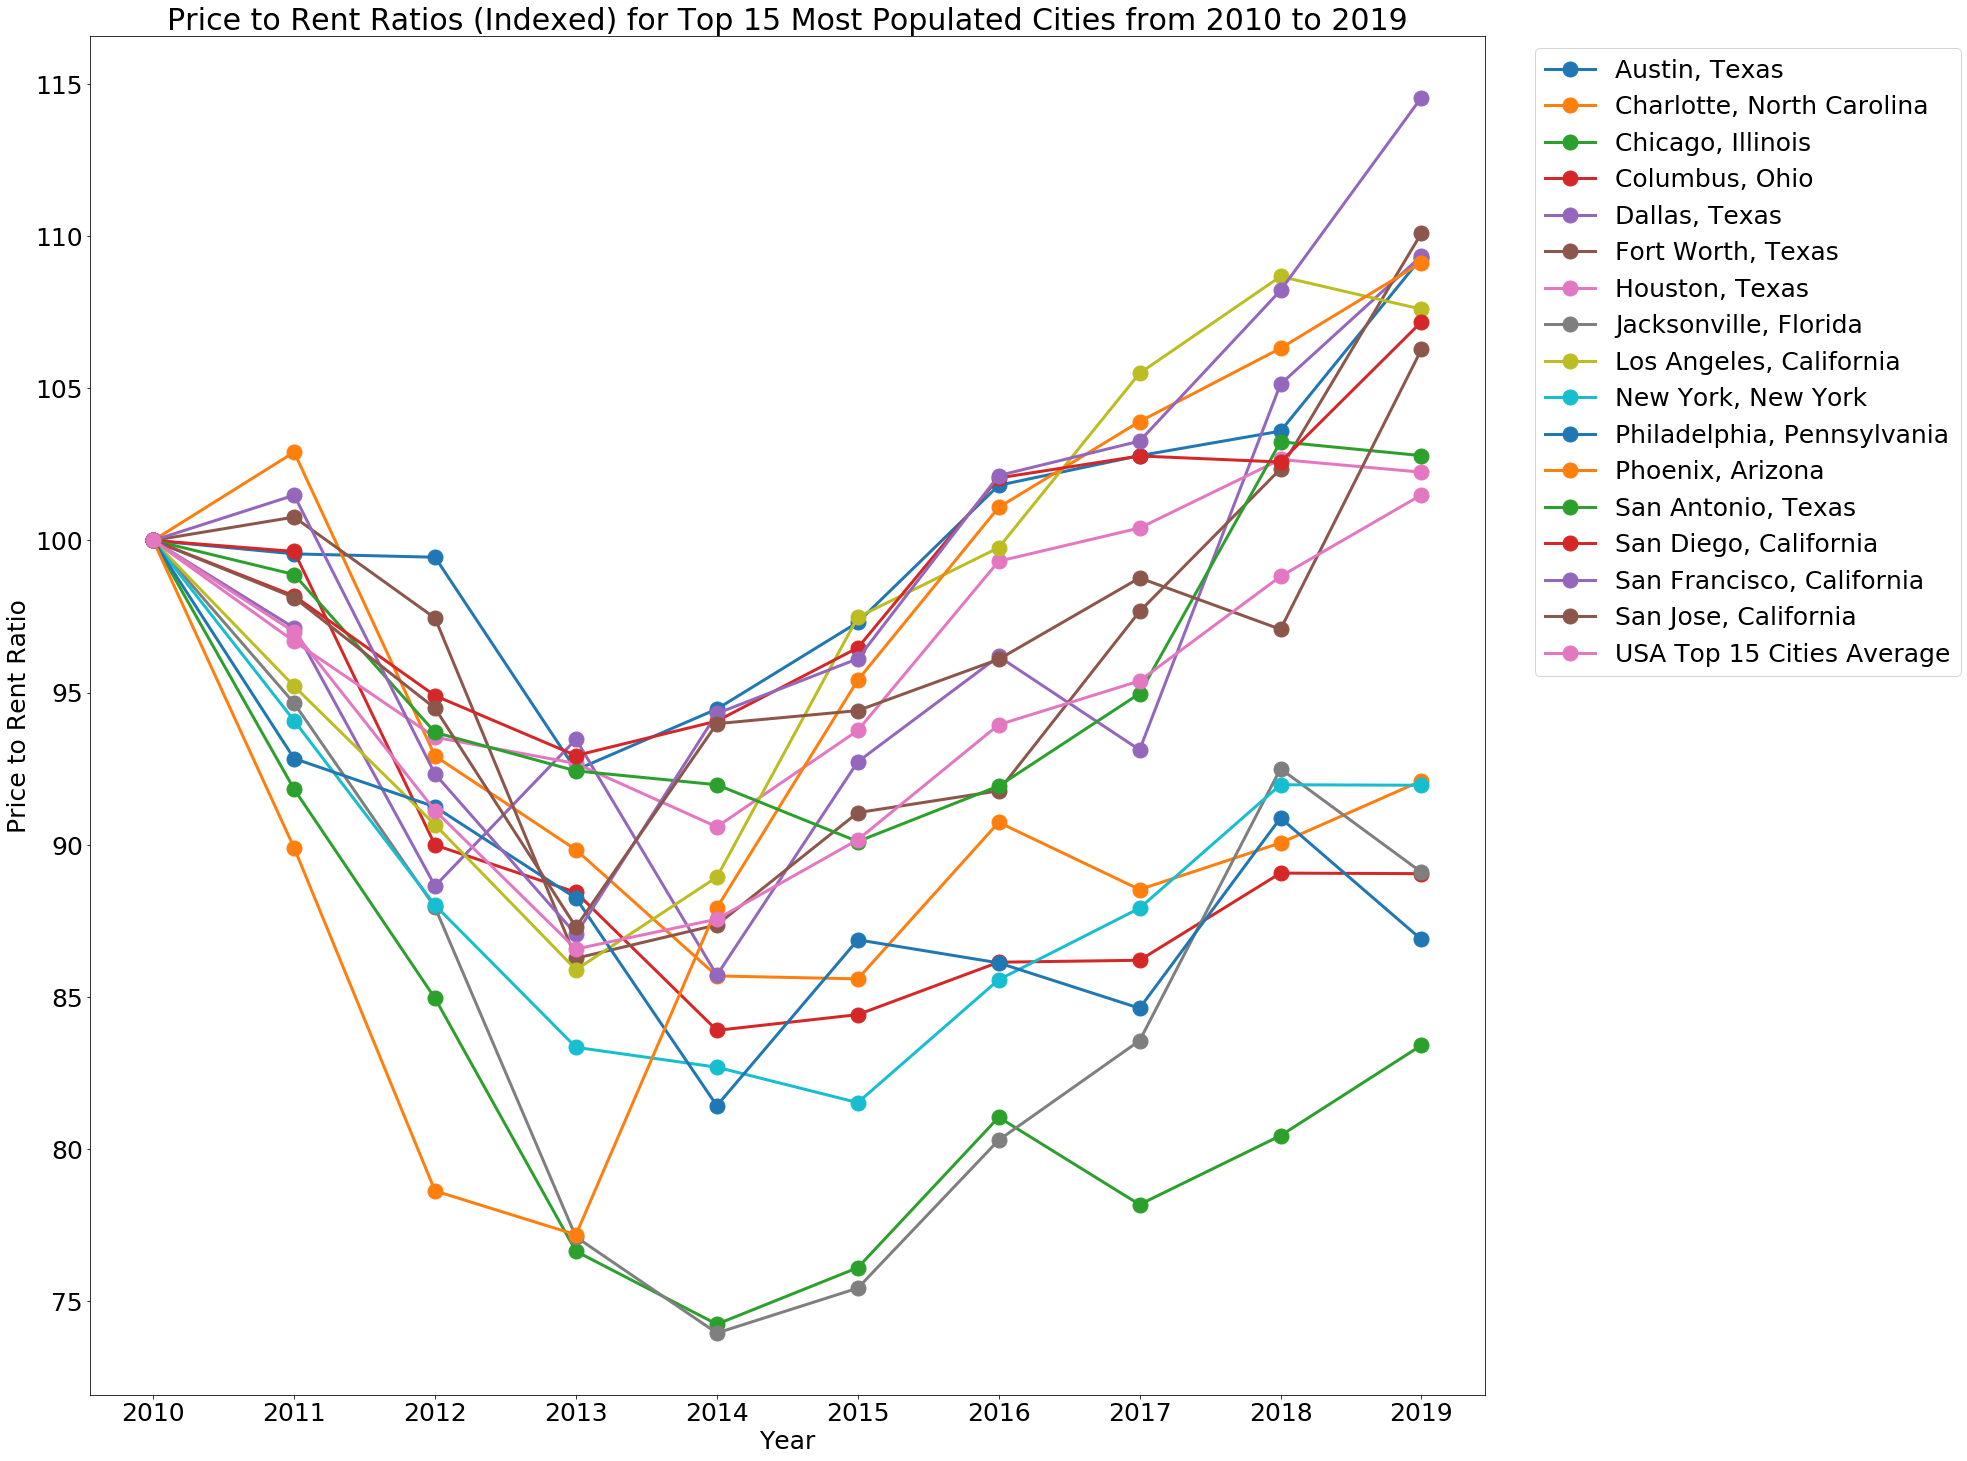

In [99]:
ax = indexed_timeseries_df.plot(
    figsize=(25,25),
    legend=True,
    linewidth=3,
    marker='o',
    markersize=15,
)
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))
matplotlib.rcParams.update({'font.size': 25})

ax.set_title('Price to Rent Ratios (Indexed) for Top 15 Most Populated Cities from 2010 to 2019',
             fontdict={'fontsize': 30, 'fontweight': 'medium'})
plt.xticks(np.arange(2010, 2020, step=1))
plt.xlabel('Year', fontsize=25)
plt.ylabel('Price to Rent Ratio', fontsize=25)
plt.savefig('images/Top_15_Timeseries_Indexed.jpg',  dpi=300, bbox_inches = "tight")

plt.show()

In [100]:
# Pass indexed_timeseries_df to helper function export_chart_json which formats data for use with Chart.js multi Line chart
export_chart_json(indexed_timeseries_df.reset_index().transpose())

'{"labels": [2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0], "datasets": [{"label": "Austin, Texas", "data": [100.0, 99.6, 99.4, 92.5, 94.5, 97.3, 101.8, 102.8, 103.6, 109.3], "fill": false}, {"label": "Charlotte, North Carolina", "data": [100.0, 102.9, 92.9, 89.8, 85.7, 85.6, 90.7, 88.5, 90.1, 92.1], "fill": false}, {"label": "Chicago, Illinois", "data": [100.0, 91.8, 84.9, 76.6, 74.2, 76.1, 81.0, 78.2, 80.4, 83.4], "fill": false}, {"label": "Columbus, Ohio", "data": [100.0, 99.6, 90.0, 88.4, 83.9, 84.4, 86.1, 86.2, 89.1, 89.0], "fill": false}, {"label": "Dallas, Texas", "data": [100.0, 97.1, 88.6, 93.5, 85.7, 92.7, 96.2, 93.1, 105.1, 109.4], "fill": false}, {"label": "Fort Worth, Texas", "data": [100.0, 100.8, 97.4, 86.3, 87.4, 91.1, 91.8, 97.7, 102.3, 110.1], "fill": false}, {"label": "Houston, Texas", "data": [100.0, 96.7, 93.5, 92.7, 90.6, 93.8, 99.3, 100.4, 102.7, 102.2], "fill": false}, {"label": "Jacksonville, Florida", "data": [100.0, 94.6, 87.